In [73]:
import warnings
import joblib
from compare import *
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

In [74]:
#load your data into the dataframe
my_data = read_csv('COM726.csv')

In [75]:
# Drop column with Nan value
my_data = my_data.drop(['Unnamed: 16'], axis=1)
my_data.head()

,Region_Country,Second_Tier_Authority,Local_Authority,Code,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Grand_Total,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
0,North East,Darlington,Darlington,E06000005,2005.0,188.7,104.9,47.5,262.5,214.0,-0.9,816.7,100.3,8.1,197.5,4.1
1,North East,Darlington,Darlington,E06000005,2006.0,175.9,108.2,46.7,260.3,210.1,-1.4,799.8,101.5,7.9,197.5,4.1
2,North East,Darlington,Darlington,E06000005,2007.0,170.7,102.8,44.7,251.2,208.4,-2.0,775.7,102.6,7.6,197.5,3.9
3,North East,Darlington,Darlington,E06000005,2008.0,177.3,101.8,44.3,252.2,193.1,-2.3,766.4,103.7,7.4,197.5,3.9
4,North East,Darlington,Darlington,E06000005,2009.0,149.2,89.3,38.7,228.8,190.2,-2.3,693.9,104.4,6.6,197.5,3.5


In [76]:
# Drop rows which have all NaN in its row
my_data=my_data.dropna(how='all')

In [77]:
# Drop columns
my_data = my_data.drop(['Region_Country','Second_Tier_Authority','Local_Authority','Code','Grand_Total'], axis=1)
my_data.head()

,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
0,2005.0,188.7,104.9,47.5,262.5,214.0,-0.9,100.3,8.1,197.5,4.1
1,2006.0,175.9,108.2,46.7,260.3,210.1,-1.4,101.5,7.9,197.5,4.1
2,2007.0,170.7,102.8,44.7,251.2,208.4,-2.0,102.6,7.6,197.5,3.9
3,2008.0,177.3,101.8,44.3,252.2,193.1,-2.3,103.7,7.4,197.5,3.9
4,2009.0,149.2,89.3,38.7,228.8,190.2,-2.3,104.4,6.6,197.5,3.5


In [78]:
my_data['Year'] = my_data['Year'].apply(np.int64)

print(my_data.dtypes)

Year                         int64
Industry_Total             float64
Commercial_Total           float64
Public_Sector_Total        float64
Domestic_Total             float64
Transport_Total            float64
LULUCF_Net_Emissions       float64
Population                 float64
Per_Capita_Emissions(t)    float64
Area(km2)                  float64
Emissions_per_km2(kt)      float64
dtype: object


In [79]:
X = my_data.drop('Per_Capita_Emissions(t)', axis=1) #  X= my_data.iloc[:,:-1]
y = my_data['Per_Capita_Emissions(t)'] # y= my_data.iloc[:,-1]

In [80]:
#split the data into train and test - split using 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#check the number of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)


 The total of training dataset (3979, 10)

 The total of test dataset (1706, 10)


In [9]:
# rfc = RandomForestRegressor()
# forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
# clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
# clf.fit(X_train, y_train)
# print(clf.best_params_)
# print(clf.best_score_)

In [23]:
rfr=RandomForestRegressor(random_state=0)
forest_grid = {
    'n_estimators': [50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,2,4,6,8]
}
CV_rfr = GridSearchCV(estimator=rfr, param_grid=forest_grid, cv= 5)
CV_rfr.fit(X_train, y_train)
CV_rfr.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

In [93]:
rf_model = RandomForestRegressor(max_depth=None, max_features= 'auto', n_estimators=200, random_state=0)
#fit the model to the training set
model1 = rf_model.fit(X_train, y_train)
#predict the model
y_pred = model1.predict(X_test)
#predict model on train data
y_pred_train = model1.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.35
Mean squared error: 2.61
Root mean squared error: 1.62
Mean absolute percentage error:, 0.04
r2 score:0.97
R2 Score Train data:1.00


<AxesSubplot:xlabel='Per_Capita_Emissions(t)'>

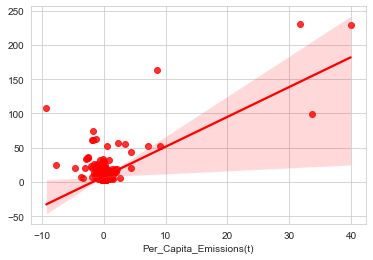

In [98]:
residual = y_pred - y_test
sns.regplot(x = residual, y = y_pred, data = None, scatter = True, color = 'red')

In [103]:

sns.lmplot(x = y_test, y = y_pred,data=None, scatter = True)

TypeError: Missing required keyword argument `data`.

Text(0.5, 1.0, 'Actual vs Predicted carbon emissions')

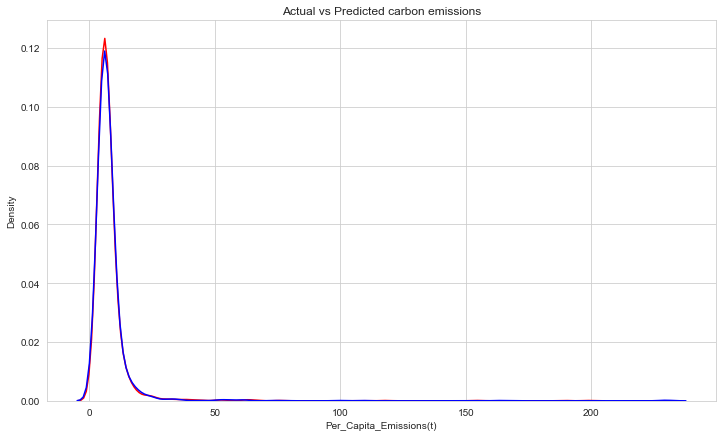

In [105]:
plt.figure(figsize=(12, 7))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Predicted carbon emissions')
# plt.xlabel('Price (in dollars)')
# plt.ylabel('Proportion of Cars')
#
# plt.show()
# plt.close()

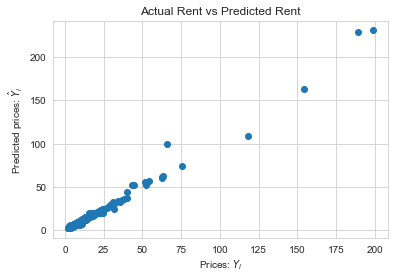

In [107]:
plt.scatter(y_test, y_pred)
#plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

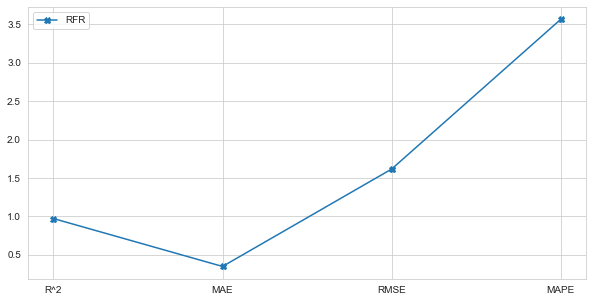

In [62]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot = compare()
plot.add('RFR', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))

In [25]:
gbr=GradientBoostingRegressor(random_state=0)
gradient_param = {'n_estimators': [50,100,200,300,400],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [1,2,3,4]
}
CV_gbr = GridSearchCV(estimator=gbr, param_grid=gradient_param, cv= 5)
CV_gbr.fit(X_train, y_train)
CV_gbr.best_params_

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 400}

In [108]:
#initialise the model
gb_model = GradientBoostingRegressor(max_depth= 3, max_features= 'sqrt', n_estimators= 400, random_state=0)
#fit gb model to the training set
model2 = gb_model.fit(X_train, y_train.ravel())  #use ravel to avoid warning about 2d array
#predict the model
y_pred = model2.predict(X_test)
#predict model on train data
y_pred_train = model2.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.34
Mean squared error: 2.52
Root mean squared error: 1.59
Mean absolute percentage error:, 0.04
r2 score:0.97
R2 Score Train data:1.00


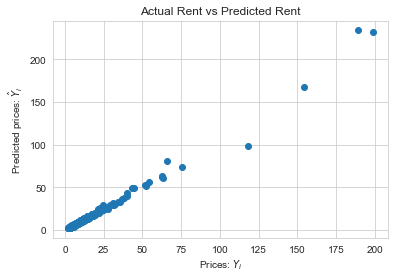

In [109]:
plt.scatter(y_test, y_pred)
#plt.plot(range(20000), range(20000))

plt.xlabel("Actual emissions")
plt.ylabel("Predicted emissions")
plt.title("Actual Rent vs Predicted emissions")

plt.show()

<AxesSubplot:xlabel='Per_Capita_Emissions(t)'>

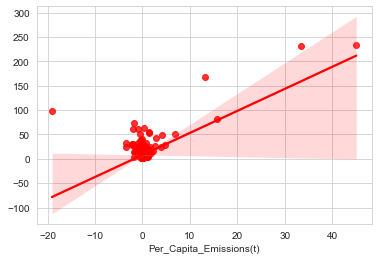

In [86]:
residual = y_pred - y_test
sns.regplot(x = residual, y = y_pred, data = None, scatter = True, color = 'red')

In [64]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9726146197289891, 1.5864388814113723)

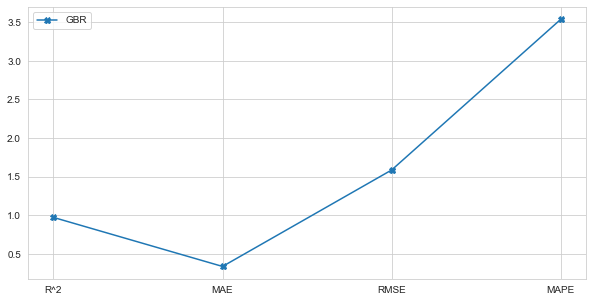

In [65]:
plot = compare()
plot.add('GBR', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))

In [17]:
knr=KNeighborsRegressor()
knr_param = {
    'leaf_size': [5,10,15,20,25,30],
    'n_neighbors': [5,10,15,20],
    'p' : [1,2]
}
CV_knr = GridSearchCV(estimator=knr, param_grid=knr_param, cv= 5)
CV_knr.fit(X_train, y_train)
CV_knr.best_params_

{'leaf_size': 15, 'n_neighbors': 5, 'p': 1}

In [87]:
#initialise the model
knn = KNeighborsRegressor(leaf_size= 15, n_neighbors= 5, p= 1)
#fit the to the training set
model5 = knn.fit(X_train, y_train.ravel())  #use ravel to avoid warning about 2d array
#predict the model
y_pred = model5.predict(X_test)
#predict model on train data
y_pred_train = model5.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.53
Mean squared error: 3.50
Root mean squared error: 1.87
Mean absolute percentage error:, 0.06
r2 score:0.96
R2 Score Train data:0.99


<AxesSubplot:xlabel='Per_Capita_Emissions(t)'>

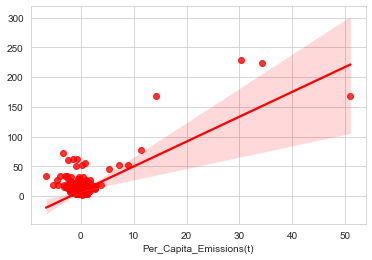

In [88]:
residual = y_pred - y_test
sns.regplot(x = residual, y = y_pred, data = None, scatter = True, color = 'red')

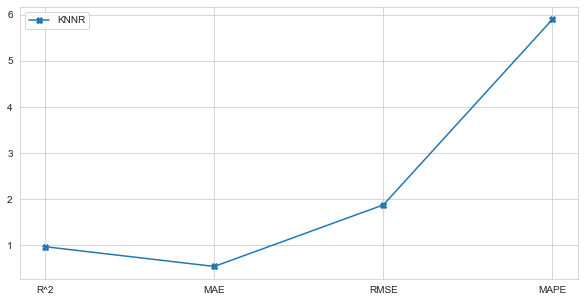

In [67]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot = compare()
plot.add('KNNR', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))

In [26]:
svr=LinearSVR(random_state=0)
svr_param = {
    'C': [1,5,10,20,40],
    'epsilon': [0.05,0.1,0.3],
}
CV_svr = GridSearchCV(estimator=svr, param_grid=svr_param, cv= 5)
CV_svr.fit(X_train, y_train)
CV_svr.best_params_

{'C': 1, 'epsilon': 0.3}

In [ ]:
sv= SVR()
sv_param = {
    'C': [1,5,10,20],
    'epsilon': [0.05,0.1,0.3],
    'gamma': ['scale','auto'],
    'kernel': ['linear','poly','rbf']
}
CV_sv = GridSearchCV(estimator=sv, param_grid=sv_param, cv= 5)
CV_sv.fit(X_train, y_train)
CV_sv.best_params_

KeyboardInterrupt: 

In [89]:
#initialise the model
svr_model = LinearSVR(C= 1, epsilon= 0.3, random_state=0)
#fit gb model to the training set
model6 = svr_model.fit(X_train, y_train)
#predict the model
y_pred = model6.predict(X_test)
#predict model on train data
y_pred_train = model6.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 3.00
Mean squared error: 20.41
Root mean squared error: 4.52
Mean absolute percentage error:, 0.43
r2 score:0.78
R2 Score Train data:0.83


<AxesSubplot:xlabel='Per_Capita_Emissions(t)'>

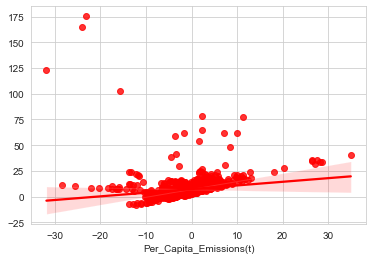

In [90]:
residual = y_pred - y_test
sns.regplot(x = residual, y = y_pred, data = None, scatter = True, color = 'red')

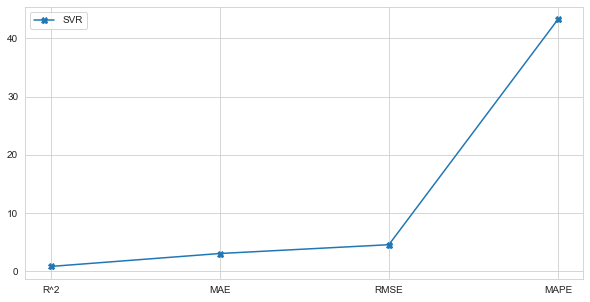

In [69]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot = compare()
plot.add('SVR', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))

In [91]:
estimators = [('rf', RandomForestRegressor(max_depth=None, max_features= 'auto', n_estimators=200, random_state=0)),
              ('svr', LinearSVR(C= 1, epsilon= 0.3, random_state=0)),
              ('knr', KNeighborsRegressor(leaf_size= 15, n_neighbors= 5, p= 1))]

final_estimator = GradientBoostingRegressor(max_depth= 3, max_features= 'sqrt', n_estimators= 400, random_state=0)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)
stackmod = reg.fit(X_train, y_train)
#predict the model
y_pred = stackmod.predict(X_test)
#predict model on train data
y_pred_train = stackmod.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.38
Mean squared error: 2.80
Root mean squared error: 1.67
Mean absolute percentage error:, 0.04
r2 score:0.97
R2 Score Train data:1.00


<AxesSubplot:xlabel='Per_Capita_Emissions(t)'>

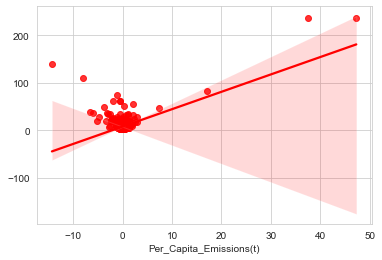

In [92]:
residual = y_pred - y_test
sns.regplot(x = residual, y = y_pred, data = None, scatter = True, color = 'red')

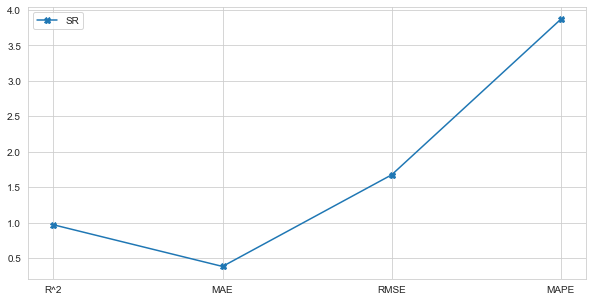

In [71]:
compare.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot = compare()
plot.add('SR', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))


In [72]:
estimators = [('rf', RandomForestRegressor(max_depth=None, max_features= 'auto', n_estimators=200, random_state=0)),

              ('knr', KNeighborsRegressor(leaf_size= 15, n_neighbors= 5, p= 1))]

final_estimator = GradientBoostingRegressor(max_depth= 3, max_features= 'sqrt', n_estimators= 400, random_state=0)
reg2 = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)
stackmod2 = reg2.fit(X_train, y_train)
#predict the model
y_pred = stackmod2.predict(X_test)
#predict model on train data
y_pred_train = stackmod2.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.2f}'.format(r2))
print('R2 Score Train data:{:.2f}'.format(r2_train))

Mean absolute error: 0.44
Mean squared error: 7.65
Root mean squared error: 2.77
Mean absolute percentage error:, 0.04
r2 score:0.92
R2 Score Train data:1.00
